In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from math import sqrt
from scipy.stats import pearsonr, spearmanr

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.linear_model import LassoLars, LinearRegression, TweedieRegressor

import acquire
import prepare
import explore
import model

%matplotlib inline
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

# acquire

In [2]:
df = acquire.get_zillow()

In [3]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,10804942,3.0,2.0,1175.0,327859.0,1953.0,4050.73,6037.0
1,14207926,3.0,2.0,1630.0,63948.0,1953.0,852.29,6037.0
2,10986950,2.0,2.0,1206.0,356218.0,1954.0,4393.33,6037.0
3,14207492,3.0,2.0,1790.0,242773.0,1964.0,3037.37,6037.0
4,11147606,3.0,2.0,1400.0,251246.0,1953.0,3081.31,6037.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56080 entries, 0 to 56079
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      56080 non-null  int64  
 1   bedroomcnt                    56080 non-null  float64
 2   bathroomcnt                   56080 non-null  float64
 3   calculatedfinishedsquarefeet  55849 non-null  float64
 4   taxvaluedollarcnt             56072 non-null  float64
 5   yearbuilt                     55831 non-null  float64
 6   taxamount                     55950 non-null  float64
 7   fips                          56080 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.4 MB


In [5]:
df.isna().sum()

parcelid                          0
bedroomcnt                        0
bathroomcnt                       0
calculatedfinishedsquarefeet    231
taxvaluedollarcnt                 8
yearbuilt                       249
taxamount                       130
fips                              0
dtype: int64

In [6]:
df = prepare.prep_zillow(df)

In [7]:
cols = ['bedrooms', 'bathrooms', 'sqft', 'yearbuilt', 'fips']

In [8]:
df = prepare.remove_outliers(df, 2.25, cols)

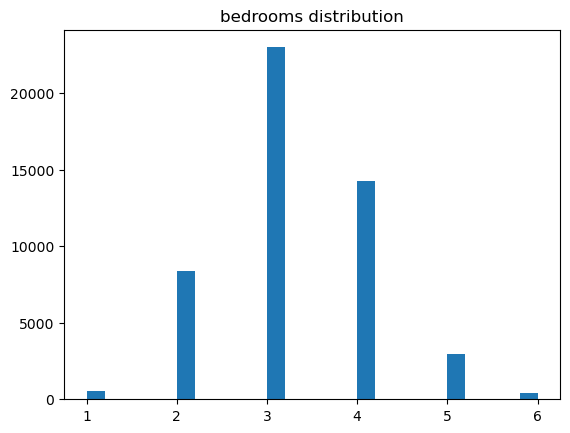

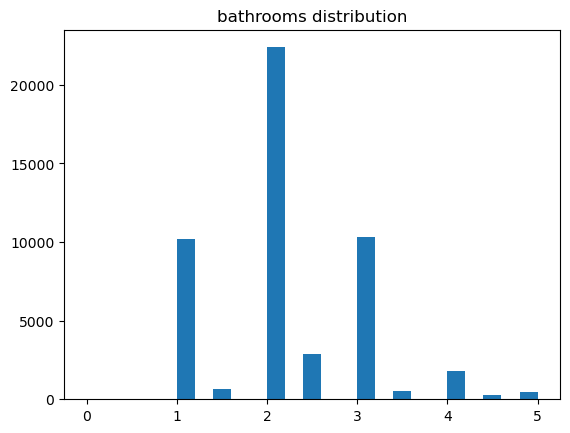

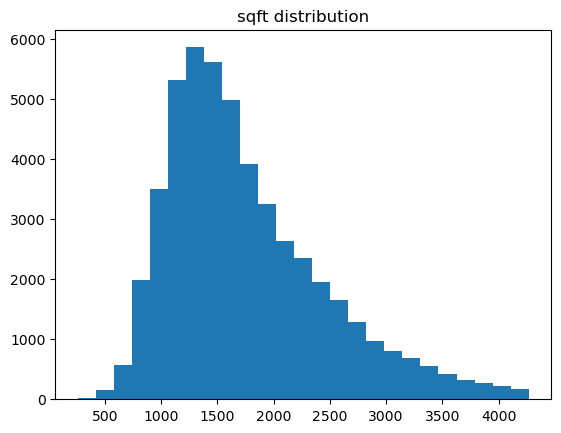

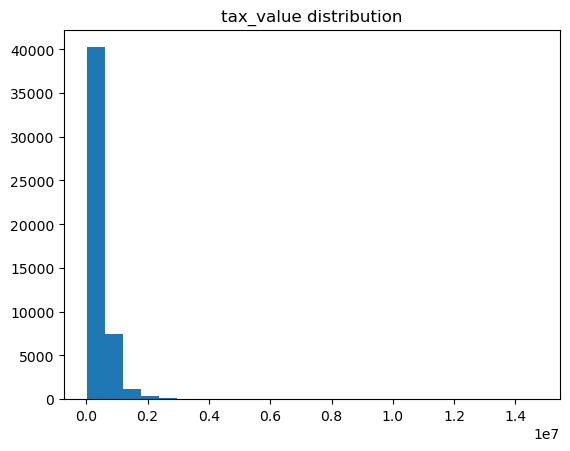

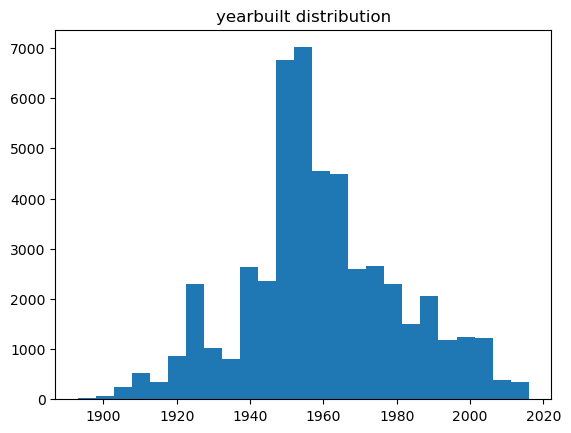

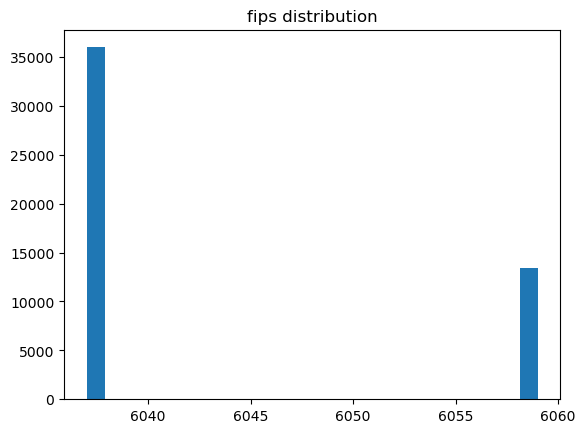

In [9]:
for col in df:

    plt.hist(df[col], bins=25)
    plt.title(f'{col} distribution')
    plt.show()

In [10]:
train, validate, test = prepare.subset_df(df)
train.shape, validate.shape, test.shape

(29676, 6) (9892, 6) (9892, 6)


((29676, 6), (9892, 6), (9892, 6))

q1 - Do bedroom and bathroom counts have a relationship?


In [11]:
train.head()

,bedrooms,bathrooms,sqft,tax_value,yearbuilt,fips
42956,4.0,3.0,3023.0,386000.0,2005.0,6037.0
32660,3.0,3.5,2319.0,557838.0,1987.0,6059.0
38800,3.0,3.0,2269.0,954293.0,1927.0,6037.0
35939,3.0,2.0,1710.0,375081.0,1965.0,6037.0
33312,3.0,2.5,1997.0,685293.0,1992.0,6059.0


In [ ]:
sns.barplot(x='bedrooms', y='bathrooms', hue='tax_value', data=train.sample(5000))

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

q2 - Does year built have an effect on the number of bedrooms?


In [ ]:
sns.barplot(x='yearbuilt', y='bedrooms', hue='tax_value', data=train)

plt.show()

q3 - Does year build have a relationship with the square feet of the house?


In [ ]:
sns.barplot(x='yearbuilt', y='sqft', hue='tax_value', data=train)

plt.show()

q4 - Does fips have a relationship with the square feet?


In [ ]:
sns.barplot(x='bedrooms', y='bathrooms', hue='tax_value', data=train)

plt.show()

q5 - Is there a relationship between bathrooms and fips?


In [ ]:
sns.barplot(x='bedrooms', y='bathrooms', hue='tax_value', data=train)

plt.show()